In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
df=pd.read_csv("customer_purchase_data.csv")
df

,Age,Salary,SpendingScore,Purchased
0,56,62318,62,1
1,46,90173,17,0
2,32,90390,88,1
3,60,72329,3,0
4,25,63088,32,0
...,...,...,...,...
795,44,46172,27,0
796,51,62874,32,0
797,55,27657,21,0
798,50,104386,8,0


In [6]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [7]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)
x_scalar

array([[ 1.11189633, -0.21148586,  0.43301006],
       [ 0.36112231,  0.75259749, -1.13492016],
       [-0.68996133,  0.76010803,  1.3389253 ],
       ...,
       [ 1.03681893, -1.41113019, -0.99554858],
       [ 0.66143192,  1.24452055, -1.4485062 ],
       [-0.01426471, -0.79616581,  0.781439  ]], shape=(800, 3))

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.2,random_state=42)

In [9]:
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0])

In [11]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.89375

In [12]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[70, 13],
       [ 4, 73]])

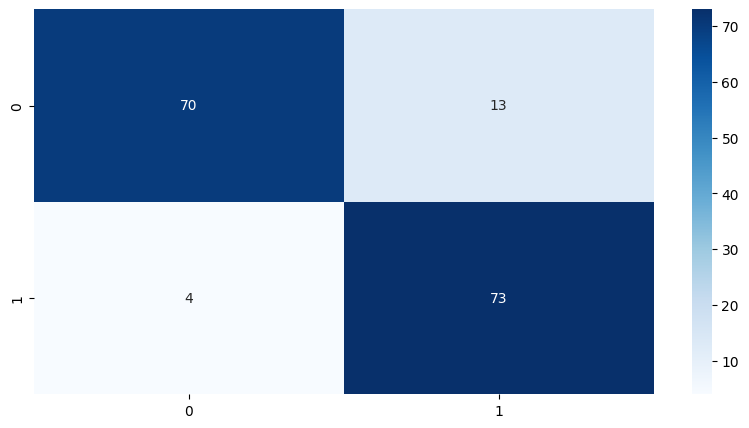

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.show()